[1.         0.98924731 1.         1.         1.         1.
 1.        ]
Accuracy score = 0.9984639016897081
time for training and predicting the test sets = 0.14321852400462376 s
Test score = 0.9923076923076923
time for the learning curve = 8.425135347999458 s


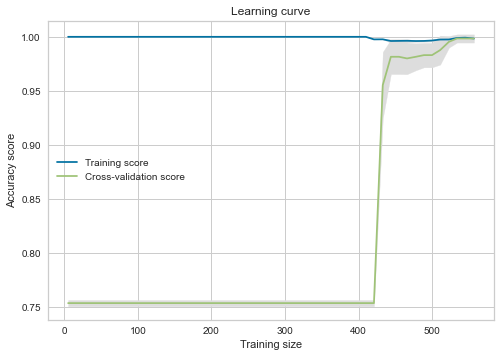

In [36]:
# Dataset 2 : Wines
# Output : Type of wine : red or white
# KNeighborsClassifier() --> weights = 'uniform'

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# model 
from sklearn.neighbors import KNeighborsClassifier
# cross validation
from sklearn.model_selection import cross_val_score
# validation curve
from yellowbrick.model_selection import validation_curve
# learning curve
from sklearn.model_selection import learning_curve
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

#dataset
a = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([10*i for i in range(650)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['type'])

#output
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#time before training the model
time1 = time.perf_counter()

model = KNeighborsClassifier(weights = 'uniform')

model.fit(X_train,y_train)

validation = cross_val_score(model, X, y, cv=7)
print(validation)
print('Accuracy score =', validation.mean())

#Testing the test set
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)

#time after predicting the test sets
time2 = time.perf_counter()
timeA = time2 - time1
print('time for training and predicting the test sets =',timeA,'s')

print('Test score =', score)

#Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(weights = 'uniform') , X , y , train_sizes=np.linspace(0.01,1,50), cv=7, scoring = 'accuracy', n_jobs= -1)

#time after doing the learning curve
time3 = time.perf_counter()
timeB = time3 - time2
print('time for the learning curve =',timeB,'s')

train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')


plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')




[1.         0.98924731 1.         1.         1.         1.
 1.        ]
Accuracy score = 0.9984639016897081
time for training and predicting the test sets = 0.07064245799847413 s
Test score = 0.9923076923076923
time for the learning curve = 7.446920772999874 s


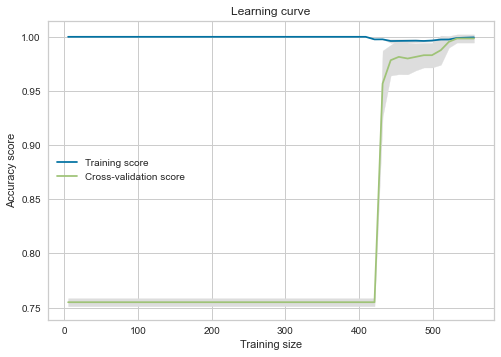

In [31]:
# Dataset 2 : Wines
# Output : Type of wine : red or white
# KNeighborsClassifier() --> weights = 'distance'

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# model 
from sklearn.neighbors import KNeighborsClassifier
# cross validation
from sklearn.model_selection import cross_val_score
# validation curve
from yellowbrick.model_selection import validation_curve
# learning curve
from sklearn.model_selection import learning_curve
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

#dataset
a = io.open('wine-quality-white-and-red.csv', encoding='latin-1')
df = pd.read_csv(a)
df = df.take([10*i for i in range(649)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['type'])

#output
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = KNeighborsClassifier(weights = 'distance')

time1 = time.perf_counter()

model.fit(X_train,y_train)

validation = cross_val_score(model, X, y, cv=7)

print(validation)
print('Accuracy score =', validation.mean())

#Testing the test set
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)

#time after training and predicting the test sets
time2 = time.perf_counter()
timeA = time2 - time1
print('time for training and predicting the test sets =',timeA,'s')

print('Test score =', score)

#Plot the learning curve
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(weights = 'uniform') , X , y , train_sizes=np.linspace(0.01,1,50), cv=7, scoring = 'accuracy', n_jobs= -1)

#time after doing the learning curve
time3 = time.perf_counter()
timeB = time3 - time2
print('time for the learning curve =',timeB,'s')

#standard deviation
train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)
#means
train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')
plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc ='best')



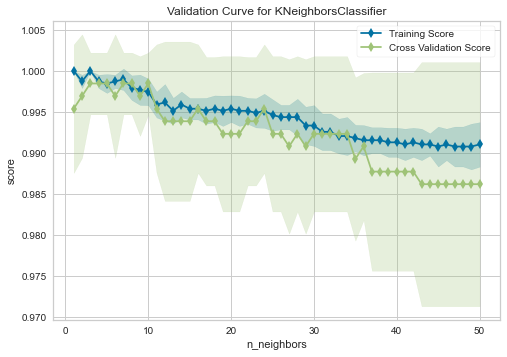

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for KNeighborsClassifier'}, xlabel='n_neighbors', ylabel='score'>,
                cv=7, estimator=KNeighborsClassifier(),
                param_name='n_neighbors',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]))
time for doing the validation and learning curve = 14.821728969996911 s


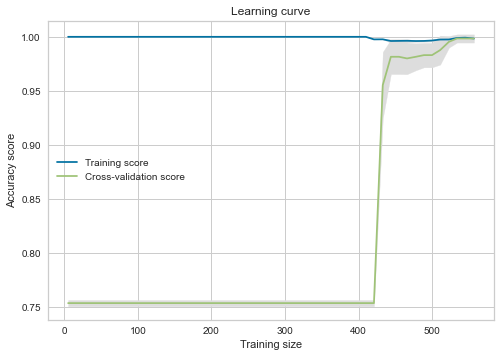

In [37]:
# Hyperparameters : weights = 'uniform'
# Vary : n_neighbors

time1 = time.perf_counter()

#validation curve
print(validation_curve(KNeighborsClassifier(weights = 'uniform') , 
                       X , y , 
                       param_name ='n_neighbors', 
                       param_range=np.linspace(1,50,dtype="int"), 
                       cv=7, 
                       score='accuracy'))

#learning curve
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(weights = 'uniform') , 
                                                         X , y , 
                                                         train_sizes=np.linspace(0.01,1,50), 
                                                         cv=7, 
                                                         scoring = 'accuracy', 
                                                         n_jobs= -1)

time2 = time.perf_counter()
timeA = time2 - time1
print('time for doing the validation and learning curve =',timeA,'s')

#means
train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

#standard deviation
train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

# plot the figure
plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')

plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

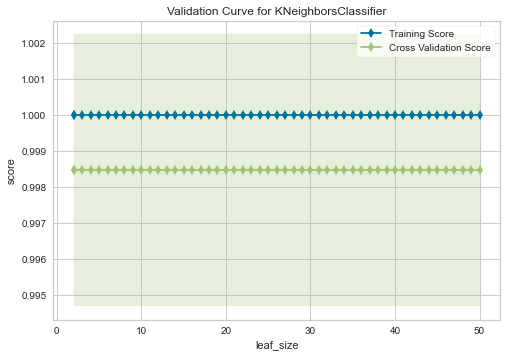

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for KNeighborsClassifier'}, xlabel='leaf_size', ylabel='score'>,
                cv=7, estimator=KNeighborsClassifier(n_neighbors=3),
                param_name='leaf_size',
                param_range=array([ 2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]))
time for doing the validation and learning curve = 11.727090766000401 s


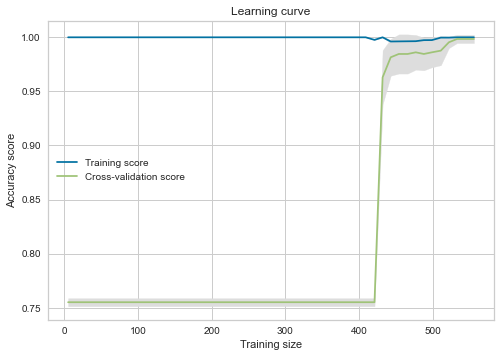

In [30]:
# Hyperparameters : n_neighbors = 3, weights = 'uniform'
# Vary : leaf_size

import time
time1 = time.perf_counter()

#validation curve
print(validation_curve(KNeighborsClassifier(n_neighbors = 3) , 
                       X , y , 
                       param_name ='leaf_size', 
                       param_range=np.linspace(2,50,dtype="int"), 
                       cv=7, 
                       score='accuracy'))

#learning curve
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(n_neighbors = 3) , 
                                                         X , y , 
                                                         train_sizes=np.linspace(0.01,1,50), 
                                                         cv=7, 
                                                         scoring = 'accuracy', 
                                                         n_jobs= -1)

time2 = time.perf_counter()
time = time2 - time1
print('time for doing the validation and learning curve =',time,'s')

#means
train_mean = np.mean(train_scores, axis = 1)
valid_mean = np.mean(valid_scores, axis = 1)

#standard deviation
train_std = np.std(train_scores, axis = 1)
valid_std = np.std(valid_scores, axis = 1)

# plot the figure
plt.plot(train_sizes,train_mean, label = 'Training score')
plt.plot(train_sizes,valid_mean, label = 'Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = '#DDDDDD')
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = '#DDDDDD')

plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc = 'best')

In [39]:
# Hyperparameters : n_neighbors = 3, weights = 'uniform', leaf_size = default

import time
time1 = time.perf_counter()
model = KNeighborsClassifier(n_neighbors = 3, 
                             weights = 'uniform')

model.fit(X_train,y_train)
validation = cross_val_score(model, X, y, cv=7)
print(validation)
print('accuracy score for upgraded model= ', validation.mean())

#Testing the test set
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)
print('Test score =', score)
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)
print('Test score upgraded model =', score)


print('----------')

#default model
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)
predictions = model2.predict(X_test)
validation2 = cross_val_score(model2, X, y, cv=7)
predictions2 = model2.predict(X_test)
score2 = accuracy_score(y_test,predictions2)
print(validation2[1:])
print('accuracy score default model = ', validation2[1:].mean())
print('Test score default model =', score2)


[1.         0.98924731 1.         1.         1.         1.
 1.        ]
accuracy score for upgraded model=  0.9984639016897081
Test score = 0.9923076923076923
Test score upgraded model = 0.9923076923076923
----------
[0.98924731 1.         1.         1.         1.         1.        ]
accuracy score default model =  0.9982078853046595
Test score default model = 0.9923076923076923
